# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
import seaborn as sns
from scipy.stats import bernoulli
from scipy.stats import binom
import matplotlib.pyplot as plt
from scipy.stats import poisson
import math
import numpy as np

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [2]:
p = 0.6 #apples
q = 0.4 #naranjas

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

Tal y como lo entiendo, solo hay que elevarlo al número de veces que queramos que se repita el evento

In [3]:
round(p**5,3)

0.078

Y en este caso mutiplicar ambas probabilidades, entendiendo los sucesos como independientes al volver a llenar el cesto

In [4]:
prob1=((p**5) * (q**15)) # no lo rendondeo porque sale 0,0
prob1

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

Primero obtenemos el número combinatorio:

In [5]:
comb=math.comb(20,15)

y después lo multiplicamos por las posibilidades de sacar 5 manzanas y 15 naranjas

In [6]:
(comb * prob1)

0.0012944935222876579

y comprobamos:

In [7]:
comp=binom(20, 0.6)
comp.pmf (5)

0.0012944935222876511

In [8]:
comp2=binom(20,0.4)
comp2.pmf (15)

0.0012944935222876511

##### In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

$$P(X \leq k)=\sum_{k = 0} ^ x {N \choose k} p ^ {k} (1 - p)^ {N - k}$$

Primero dividiré la formula en variables, y luego las sumaré:
empiezo por los números combinatorios:

In [9]:
k1= math.comb(20,1)
k2= math.comb(20,2)
k3= math.comb(20,3)
k4= math.comb(20,4)
k5= math.comb(20,5)

Sigo con las probabilidades para cada caso:

In [10]:
manz1= 0.6*0.4**19
manz2=0.6**2*0.4**18
manz3= 0.6**3*0.4**17
manz4= 0.6**4*0.4**16
manz5= 0.6**5*0.4**15

multiplico ambas

In [11]:
proba1= k1 * manz1
proba2= k2 * manz2
proba3= k3 * manz3
proba4= k4 * manz4
proba5= k5 * manz5


Y ya por fin, las sumo. Seguro que se puede hacer mejor

In [12]:
proba1+proba2+proba3+proba4+proba5

0.0016115136483400101

Y comprobamos:

In [13]:
comp.cdf (5) 

0.001611524643456288

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

Ploteo la probabilidad acumulada, que creo que es lo que hay que plotear. Las distribuciones binomiales  creo que no tienen pdf

Text(0.5, 1.0, 'Masa de probabilidad')

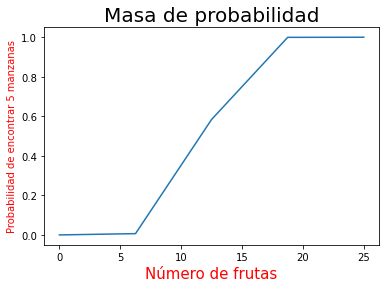

In [14]:
x = np.linspace(0, 25, 5)
y = comp.cdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)
plt.xlabel("Número de frutas", 
          color="red", 
          size = 15,
           )
plt.ylabel ("Probabilidad de encontrar 5 manzanas",
           color="red",
           size=10,
           )
plt.title ("Masa de probabilidad",
          color="Black",
          size=20,
          )

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

Primero lo saco scipy, y luego lo calculo

In [15]:
from scipy.stats import poisson

In [16]:
my_poisson = poisson(mu=2.3)

In [17]:
my_poisson.pmf(5)

0.053775025581946814

$$P(X=k)=\frac{\lambda ^{k}e^{-\lambda }}{k!}$$

Pasamos nuestros valores:

$$P(X=5)=\frac{2.3 ^ {5}e ^ {-2.3 }} {5!}$$

Y calculamos:

In [18]:
(2.3**5) * (math.e**-2.3)/math.factorial (5)

0.05377502558194681

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

Text(0.5, 1.0, 'Probabilidad de número de goles')

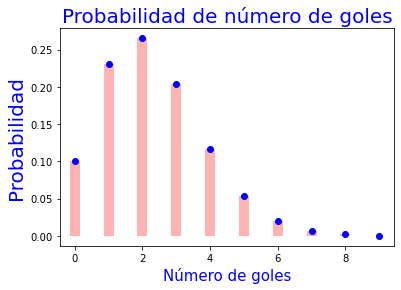

In [19]:
x = np.arange (0,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, my_poisson.pmf(x), 'bo')
ax.vlines(x, 0, my_poisson.pmf(x), colors="red", lw=10, alpha=0.3)

plt.xlabel("Número de goles", 
          color="Blue", 
          size = 15,
           )
plt.ylabel ("Probabilidad",
           color="Blue",
           size=20,
           )
plt.title ("Probabilidad de número de goles",
          color="Blue",
          size=20,
          )